# K-means clustering

- https://allisonhorst.github.io/palmerpenguins/
- https://marinebio.net/marinescience/04benthon/AApenguins.htm

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [3]:
penguins = pd.read_feather("datasets/penguins.feather")
penguins

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
features = penguins.iloc[:,1:5]
le = LabelEncoder()
labels = le.fit_transform(penguins.species)
target_names = dict(zip(range(3), le.classes_))
target_names

{0: 'Adelie', 1: 'Chinstrap', 2: 'Gentoo'}

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, KMeans

pca = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])

k_means = KMeans(n_clusters=3, init='k-means++', max_iter=999, n_init=10, random_state=101)

mb_k_means = MiniBatchKMeans(n_clusters=3, init='k-means++', max_iter=999, batch_size=30, n_init=10, random_state=101)

pca_features = pca.fit_transform(features)
print('Explained variance:')
print(pca.named_steps['pca'].explained_variance_)

k_means.fit(pca_features)
mb_k_means.fit(pca_features)

Explained variance:
[2.75362487 0.7804609  0.36975289 0.10820954]


C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1962: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


MiniBatchKMeans(batch_size=30, max_iter=999, n_clusters=3, n_init=10,
                random_state=101)

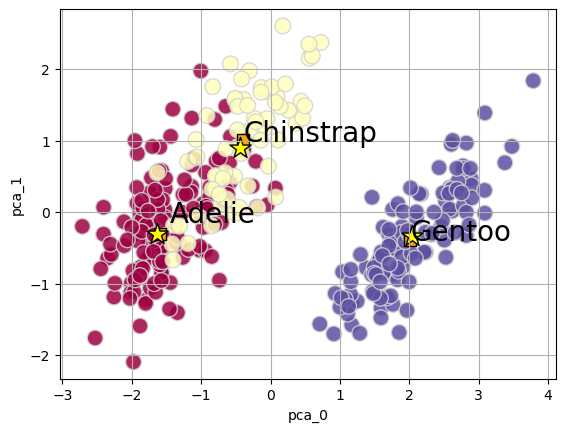

In [9]:
import matplotlib.pyplot as plt

plt.scatter(pca_features[:,0], pca_features[:,1],
            s=2**7, c=labels,
            edgecolors='lightgrey',
            alpha=0.85,
            cmap='Spectral')

plt.xlabel('pca_0')
plt.ylabel('pca_1')
plt.grid()

km_centers = k_means.cluster_centers_
mbkm_centers = mb_k_means.cluster_centers_

plt.scatter(km_centers[:,0], km_centers[:,1], s=2**6,
            marker='s', c='orange', edgecolors='black')
plt.scatter(mbkm_centers[:,0], mbkm_centers[:,1], s=2**8,
            marker='*', c='yellow', edgecolors='black')

for class_no in range(0,3):
    plt.annotate(target_names[class_no],
                 (pca_features[labels==class_no, 0].mean(),
                  pca_features[labels==class_no, 1].mean()),
                 fontsize=20)
plt.show()

In [10]:
import numpy as np
np.set_printoptions(precision=3, suppress=True)

for iteration in range(1, 10):
    k_means = KMeans(n_clusters=3, init='random',
                     max_iter=iteration, n_init=1, random_state=0)
    k_means.fit(pca_features)
    print("Iteration: %i - 2nd centroid: %s" % (iteration, k_means.cluster_centers_[1]))

Iteration: 1 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 2 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 3 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 4 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 5 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 6 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 7 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 8 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]
Iteration: 9 - 2nd centroid: [ 2.013 -0.394 -0.036  0.006]


C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmea

In [13]:
pca = Pipeline([('scaling', StandardScaler()), ('pca', PCA())])

k_means = KMeans(n_clusters=3, init='k-means++', max_iter=999, n_init=10, random_state=101)

pca_features = pca.fit_transform(features)
k_means.fit(pca_features)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true=labels, y_pred=k_means.labels_)
cm_str = str(cm).split('\n')
for row in range(3):
    print(f"{target_names[row]:15} {cm_str[row]}")

Adelie          [[  0  22 124]
Chinstrap        [  0  63   5]
Gentoo           [119   0   0]]


C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmea

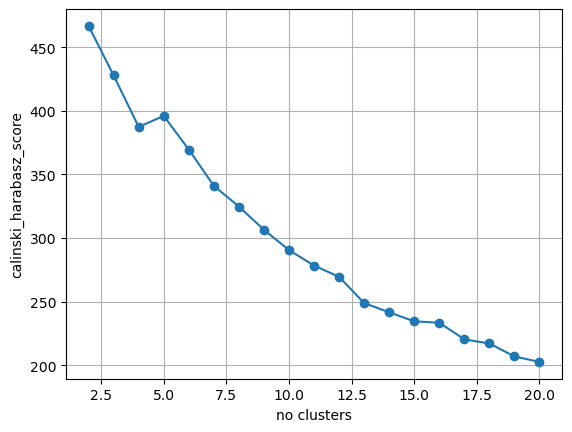

In [16]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = list()
max_clus = 20
for clus_no in range(2, max_clus+1):
    k_means = KMeans(n_clusters=clus_no, init='k-means++',
                     max_iter=999, n_init=10, random_state=101)
    k_means.fit(pca_features)
    ch = calinski_harabasz_score(pca_features, k_means.labels_)
    ch_scores.append(ch)

plt.plot(range(2, max_clus+1), ch_scores, 'o-')
plt.xlabel('no clusters')
plt.ylabel('calinski_harabasz_score')
plt.grid()
plt.show()

In [17]:
k_means = KMeans(n_clusters=5, init='k-means++', max_iter=999, n_init=10, random_state=101)

k_means.fit(pca_features)

cm = confusion_matrix(y_true=labels, y_pred=k_means.labels_)

for row in range(3):
    print(f"{target_names[row]:10} {cm[row,:]}")

Adelie     [ 0 84  2  0 60]
Chinstrap  [ 0  5 63  0  0]
Gentoo     [62  0  0 57  0]


C:\Users\JAVOHIR\miniconda3\envs\mohirdsai\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


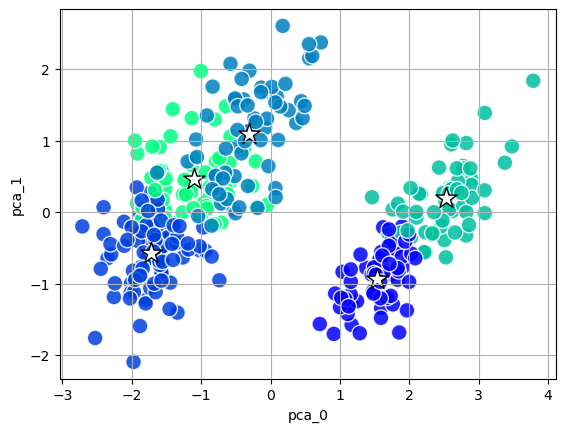

In [19]:
plt.scatter(pca_features[:,0], pca_features[:,1], s=2**7, c=k_means.labels_,
            edgecolors='white', alpha=0.85, cmap='winter')

km_centers = k_means.cluster_centers_
plt.scatter(km_centers[:,0], km_centers[:,1], s=2**8,
            marker='*', c='white', edgecolors='black')

plt.xlabel('pca_0')
plt.ylabel('pca_1')
plt.grid()
plt.show()

# K-Nearest Neighbors

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

knn = KNeighborsClassifier(metric='euclidean')
kfold = KFold(n_splits=10, shuffle=True, random_state=0)
param_grid = {"n_neighbors" : range(1, 16)}
experiment = GridSearchCV(knn, param_grid=param_grid, cv=kfold)

In [21]:
experiment.fit(features, labels)
print(f"best params: {experiment.best_params_}")
print(f"best cv accuracy: {experiment.best_score_:0.3}")

best params: {'n_neighbors': 1}
best cv accuracy: 0.859


In [22]:
experiment.fit(pca_features, labels)
print(f"best params: {experiment.best_params_}")
print(f"best cv accuracy: {experiment.best_score_:0.3}")

best params: {'n_neighbors': 3}
best cv accuracy: 0.991


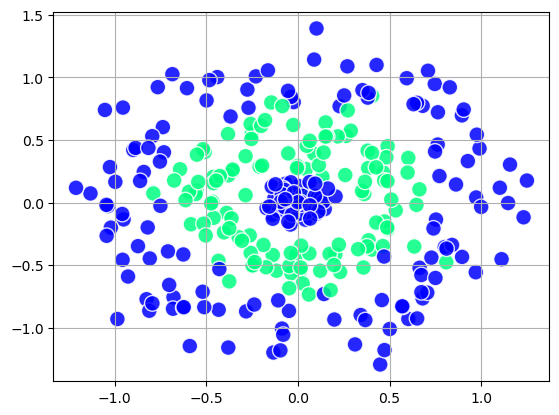

In [23]:
from sklearn.datasets import make_circles, make_blobs

strange_data = make_circles(n_samples=500, shuffle=True, noise=0.15,
                            random_state=101, factor=0.5)
center = make_blobs(n_samples=100, n_features=2, centers=1,
                    cluster_std=0.1, center_box=(0, 0))
first_half = np.row_stack((strange_data[0][:250,:], center[0][:50,:]))
first_labels = np.append(strange_data[1][:250], np.array([0]*50))
second_half = np.row_stack((strange_data[0][250:,:], center[0][50:,:]))
second_labels = np.append(strange_data[1][250:], np.array([0]*50))

plt.scatter(first_half[:,0], first_half[:,1], s=2**7, c=first_labels,
            edgecolors='white', alpha=0.85, cmap='winter')
plt.grid()
plt.show()

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

kNN = KNeighborsClassifier(n_neighbors=3, weights='uniform',
                           algorithm='auto', metric='euclidean')
kNN.fit(first_half,first_labels)
acc = accuracy_score(y_true=second_labels, y_pred=kNN.predict(second_half))
print(f"Learning accuracy score: {acc:0.3}")

Learning accuracy score: 0.94
